

DES Lignin : Simulation Model


INPUT
Molecular structure of MWL (SMILES) : 
COc1cc(C(O)C(CO)Oc2ccc(C(O)C(CO)Oc3ccc(C(O)C(CO)Oc4ccc(C(O)C(CO)Oc5ccc(C(O)C(CO)Oc6ccc(C7OCC8C(c9cc(OC)c%10c(c9)-c9cc(C%11OCC%12C(c%13cc(OC)c%14c(c%13)C(CO)C(c%13ccc(OC(CO)C(O)c%15ccc(O)c(OC)c%15)c(OC)c%13)O%14)OCC%11%12)cc(OC)c9OC(CO)C(c9cc(OC)c%11c(c9)C(CO)C(c9ccc(O)c(OC)c9)O%11)O%10)OCC78)cc6OC)cc5OC)cc4OC)cc3OC)cc2OC)ccc1O

Molecular weight (g/mol)           : 2424

Functional group                   : {'ether': 10, 'carbonyl': 0, 'methoxy': 13, 'phenolicOH': 3, 'aliphaticOH_secondary': 6, 'aliphaticOH_primary': 9, 'cinnamyl_alcohol': 0}

Poly dispersity index (PDI)        : 1.0

OUTPUT
Molecular structure of DESL (SMILES)             : 
COc1cc(CC(C)=O)ccc1O.COc1cc(CC(=O)CO)ccc1O.COc1cc(CC(=O)CO)ccc1O.COc1cc(CC(=O)CO)ccc1O.COc1cc(CC(C)=O)ccc1O.COc1cc(CC(=O)CO)ccc1O.CCCc1cc(OC)c(O)c(C(CO)Cc2ccc(O)c(OC)c2)c1.COc1cc(CC(CO)c2cc(C3OCC4C(c5cc(OC)c(O)c(-c6cc(C7OCC8C(c9ccc(O)c(OC)c9)OCC78)cc(OC)c6O)c5)OCC34)cc(O

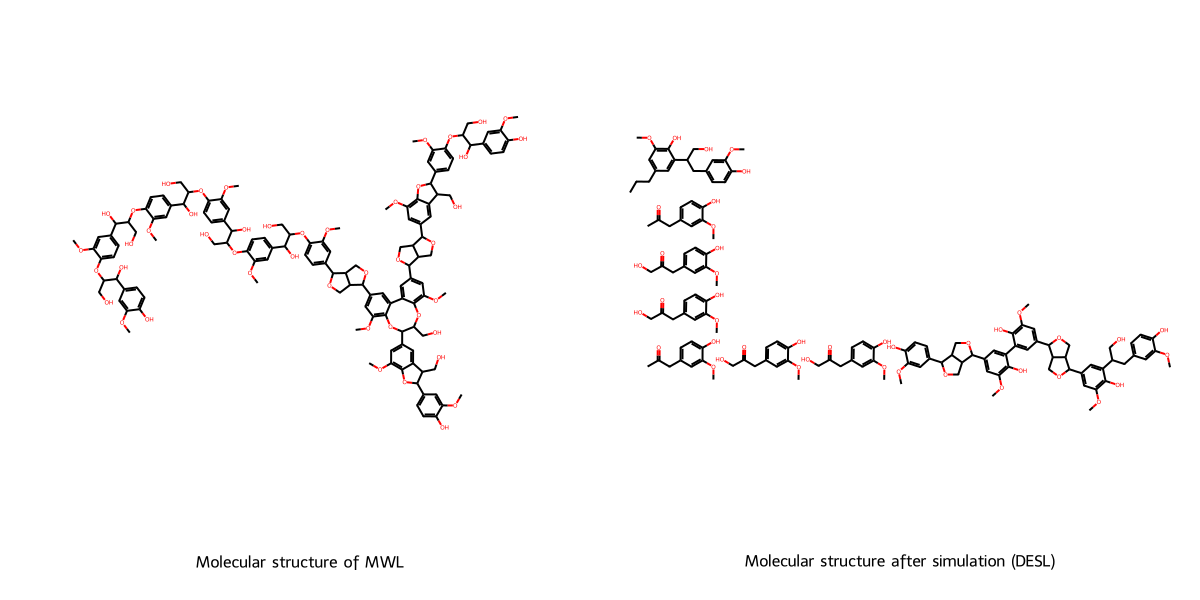

In [ ]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Draw
from utils.desl_simulation import find_functional_groups_counts, calculate_pdi, simulate_DES_deployermization

# Configuring MWL structure in SMILES representation
smile = "OC=1C=CC(=CC1OC)C(O)C(OC=2C=CC(=CC2OC)C(O)C(OC=3C=CC(=CC3OC)C(O)C(OC=4C=CC(=CC4OC)C(O)C(OC=5C=CC(=CC5OC)C(O)C(OC=6C=CC(=CC6OC)C7OCC8C(OCC78)C9=CC(OC)=C%10OC(C%11=CC(OC)=C%12OC(C=%13C=CC(O)=C(OC)C%13)C(C%12=C%11)CO)C(OC%14=C(OC)C=C(C=C%14C%10=C9)C%15OCC%16C(OCC%15%16)C%17=CC(OC)=C%18OC(C=%19C=CC(OC(CO)C(O)C=%20C=CC(O)=C(OC)C%20)=C(OC)C%19)C(C%18=C%17)CO)CO)CO)CO)CO)CO)CO"
mol = Chem.MolFromSmiles(smile)

# Precompute necessary molecular characteristics
canonical_smiles = Chem.CanonSmiles(smile)
molecular_weight = int(Descriptors.ExactMolWt(mol))
functional_groups = find_functional_groups_counts(smile)
pdi = round(calculate_pdi(smile)[2], 1)

# Output the molecular structural characteristics
print("\n\nDES Lignin : Simulation Model")
print("=============================\n")

print("\nINPUT")
print(f"Molecular structure of MWL (SMILES) : \n{canonical_smiles}")
print(f"\nMolecular weight (g/mol)           : {molecular_weight}")
print(f"\nFunctional group                   : {functional_groups}")
print(f"\nPoly dispersity index (PDI)        : {pdi}")


# Perform the simulation and get the decomposed SMILES
smi = simulate_DES_deployermization(smile, 1)
mol_smi = Chem.MolFromSmiles(smi)

# Output the results for DESL structure
print("\nOUTPUT")
print(f"\nNumber of fragments  : {len(smi.split('.'))}")
print("\t" + "\n\t".join(smi.split('.')))

# Calculate and print the total molecular weight and other properties for the fragments
print(
    f"\nTotal Molecular weight (g/mol) of all fragments : {int(Descriptors.ExactMolWt(mol_smi))}")
print(
    f"\nFunctional group                                 : {find_functional_groups_counts(smi)}")
print(
    f"\nPoly dispersity index (PDI)                      : {round(calculate_pdi(smi)[2], 1)}")

# Draw the molecule structure
labels = ['Molecular structure of MWL',
          'Molecular structure after simulation (DESL)']
Draw.MolsToGridImage([mol, mol_smi], molsPerRow=2,
                     subImgSize=(600, 600), legends=labels)